In [1]:
import numpy as np
import os
import tempfile
import matplotlib.pyplot as plt
import keras
from keras import backend as K
from keras import layers
from keras.datasets import mnist

import tensorflow as tf

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Let’s see how the data looks like. The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28×28 grayscale image.

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

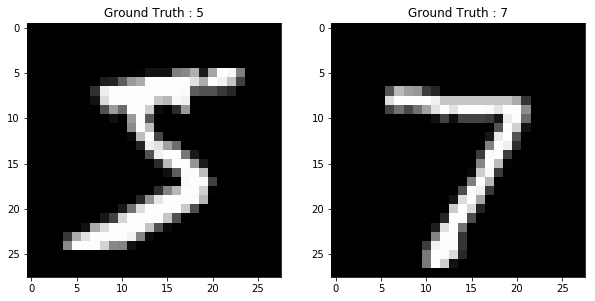

In [3]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

Process the data
The images are grayscale and the pixel values range from 0 to 255. We will apply the following preprocessing to the data before feeding it to the network.

Convert each image matrix ( 28×28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.

In [0]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

#converting the data to float and scalling between 0 to 1
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

Convert the labels from integer to categorical ( one-hot ) encoding since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer.
For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000

In [5]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


. Keras Workflow for training the network
We have described the Keras Workflow in our previous post. The block diagram is given here for reference. Basically, once you have the training and test data, you can follow these steps to train a neural network in Keras.
keras-workflow
https://www.learnopencv.com/wp-content/uploads/2017/09/keras-workflow.jpg



Create the Network
We had mentioned that we will be using a network with 2 hidden layers and an output layer with 10 units. The number of units in the hidden layers is kept to be 512. The input to the network is the 784-dimensional array converted from the 28×28 image.

We will use the Sequential model for building the network. In the Sequential model, we can just stack up layers by adding the desired layer one by one. We use the Dense layer, also called fully connected layer since we are building a feedforward network in which all the neurons from one layer are connected to the neurons in the previous layer. Apart from the Dense layer, we add the ReLU activation function which is required to introduce non-linearity to the model. This will help the network learn non-linear decision boundaries. The last layer is a softmax layer as it is a multiclass classification problem. For binary classification, we can use sigmoid.

In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))

In this step, we configure the optimizer to be rmsprop. We also specify the loss type which is categorical cross entropy which is used for multiclass classification. We also specify the metrics ( accuracy in this case ) which we want to track during the training process. You can also try using any other optimizer such as adam or SGD.

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

he network is ready to get trained. This is done using the fit() function in Keras. We specify the number of epochs as 20. This means that the whole dataset will be fed to the network 20 times. We will be using the test data for validation.

In [13]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=30, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

W0823 05:46:18.669377 139782592382848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.3753 - acc: 0.8837 - val_loss: 0.1439 - val_acc: 0.9549
Epoch 2/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.1682 - acc: 0.9498 - val_loss: 0.0989 - val_acc: 0.9703
Epoch 3/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.1280 - acc: 0.9609 - val_loss: 0.1106 - val_acc: 0.9670
Epoch 4/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.1106 - acc: 0.9674 - val_loss: 0.0799 - val_acc: 0.9761
Epoch 5/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0969 - acc: 0.9711 - val_loss: 0.0833 - val_acc: 0.9758
Epoch 6/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0889 - acc: 0.9735 - val_loss: 0.0746 - val_acc: 0.9801
Epoch 7/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0826 - acc: 0.9759 - val_loss: 0.0749 - 

In [14]:
#evalvuating it
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 84us/step
Evaluation result on Test Data : Loss = 0.09614570151798016, accuracy = 0.9826


6. Check for Overfitting
The fit() function returns a history object which has a dictionary of all the metrics which were required to be tracked during training. We can use the data in the history object to plot the loss and accuracy curves to check how the training process went.
You can use the history.history.keys() function to check what metrics are present in the history. It should look like the following

[‘acc’, ‘loss’, ‘val_acc’, ‘val_loss’]

Let us plot the loss and accuracy curves.


loss curve without regularization mlp mnist
accuracy curves without regularization mlp mnist

Although the accuracy obtained above is very good, if you see the loss and accuracy curves in the above figures, you’ll notice that the validation loss initially decrease, but then it starts increasing gradually. Also, there is a substantial difference between the training and test accuracy. This is a clear sign of Overfitting which means that the network has memorized the training data very well, but is not guaranteed to work on unseen data. Thus, the difference in the training and test accuracy.

Text(0.5, 1.0, 'Accuracy Curves')

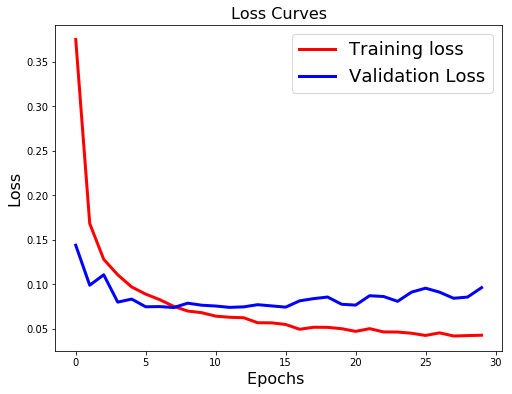

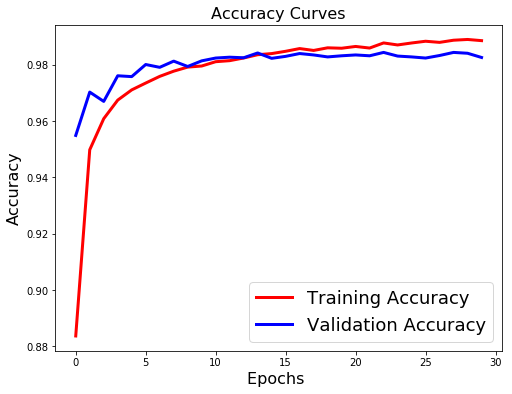

In [15]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Add Regularization to the model
Overfitting occurs mainly because the network parameters are getting too biased towards the training data. We can add a dropout layer to overcome this problem to a certain extent. In case of dropout, a fraction of neurons is randomly turned off during the training process, reducing the dependency on the training set by some amount.

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.3766 - acc: 0.8825 - val_loss: 0.1523 - val_acc: 0.9525
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1663 - acc: 0.9495 - val_loss: 0.1020 - val_acc: 0.9687
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1296 - acc: 0.9617 - val_loss: 0.0870 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1109 - acc: 0.9669 - val_loss: 0.0791 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0966 - acc: 0.9705 - val_loss: 0.0775 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0882 - acc: 0.9741 - val_loss: 0.0728 - val_acc: 0.9791
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0809 - acc: 0.9764 - val_loss: 0.0730 - 

Text(0.5, 1.0, 'Accuracy Curves')

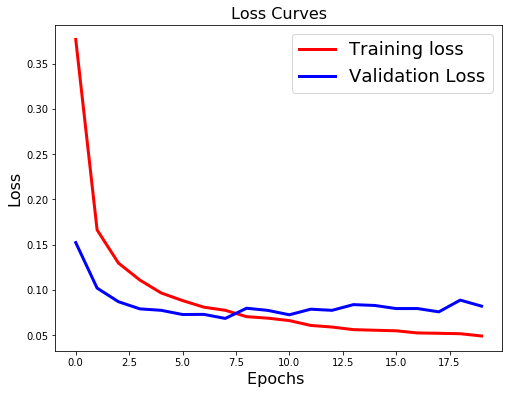

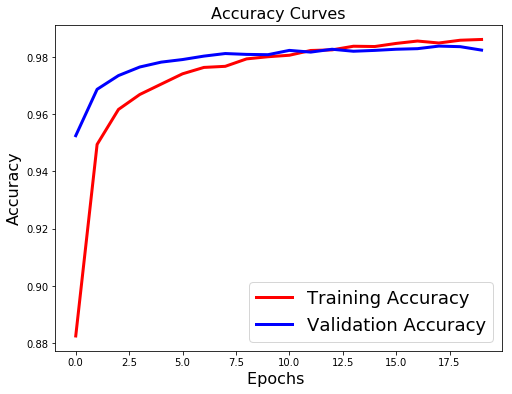

In [16]:
#checking the performance after regularisation 
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
# Predict the most likely class
model_reg.predict_classes(test_data[[0],:])

#the above method there is no score which tells us about the confidence with which the model does the prediction. In some cases, for example when there are many classes, we may want the probabilities of the different classes which indicates how confident the model is about the occurence of a particular class. We can take the decision based on these scores.
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[6.3001119e-25, 4.6016763e-15, 8.3002286e-12, 2.7886515e-12,
        1.3541951e-23, 5.0885177e-17, 1.2525504e-30, 1.0000000e+00,
        7.2319888e-18, 7.5069345e-15]], dtype=float32)

In [0]:
#feed forward network all 
import time
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.datasets import mnist


class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)


def load_data():
    print 'Loading data...'
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    X_train /= 255
    X_test /= 255

    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    X_train = np.reshape(X_train, (60000, 784))
    X_test = np.reshape(X_test, (10000, 784))

    print 'Data loaded.'
    return [X_train, X_test, y_train, y_test]


def init_model():
    start_time = time.time()
    print 'Compiling Model ... '
    model = Sequential()
    model.add(Dense(500, input_dim=784))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(300))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    rms = RMSprop()
    model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
    print 'Model compield in {0} seconds'.format(time.time() - start_time)
    return model


def run_network(data=None, model=None, epochs=20, batch=256):
    try:
        start_time = time.time()
        if data is None:
            X_train, X_test, y_train, y_test = load_data()
        else:
            X_train, X_test, y_train, y_test = data

        if model is None:
            model = init_model()

        history = LossHistory()

        print 'Training model...'
        model.fit(X_train, y_train, nb_epoch=epochs, batch_size=batch,
                  callbacks=[history],
                  validation_data=(X_test, y_test), verbose=2)

        print "Training duration : {0}".format(time.time() - start_time)
        score = model.evaluate(X_test, y_test, batch_size=16)

        print "Network's test score [loss, accuracy]: {0}".format(score)
        return model, history.losses
    except KeyboardInterrupt:
        print ' KeyboardInterrupt'
        return model, history.losses


def plot_losses(losses):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(losses)
    ax.set_title('Loss per batch')
    fig.show()

SyntaxError: ignored